In [1]:
import sys

sys.path.append("..")
from cge_modeling import CGEModel, Variable, Parameter, Equation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
variable_info = [
    Variable(
        name="Y",
        description="Total output",
    ),
    Variable(name="C", description="Household consumption"),
    Variable(name="r", description="Rental rate of capital"),
    Variable(name="P", description="Price level of consumption good"),
    Variable(name="w", description="Wage level"),
    Variable(name="resid", latex_name="varepsilon", description="Walrasian residual"),
]

param_info = [
    Parameter(name="L", description="Household labor"),
    Parameter(name="K", description="Capital stock"),
    Parameter(name="alpha", description="Share of capital in production"),
    Parameter(name="A", description="Total factor productivity"),
    Parameter(name="w_bar", latex_name=r"\bar{w}", description="Numeraire wage level"),
]

equations = [
    Equation("Production function", "Y = A * K ^ alpha * L ^ (1 - alpha)"),
    Equation("Demand for capital", "K = alpha * Y * P / r"),
    Equation("Demand for labor", "L = (1 - alpha) * Y * P / w"),
    Equation("Budget constraint", "C * P = K * r + L * w"),
    Equation("Total resource constraint", "Y = C + resid"),
    Equation("Numeraire", "w = w_bar"),
]

In [3]:
mod = CGEModel(coords=None, variables=variable_info, parameters=param_info, equations=equations)

In [4]:
mod.summary()

<IPython.core.display.Latex object>

In [5]:
mod.equation_table()

<IPython.core.display.Latex object>

In [6]:
data = {"L": 7000, "K": 4000, "P": 1, "r": 1, "resid": 0, "w_bar": 1}
calib_res = mod.calibrate(data)

In [7]:
res = mod.simulate(
    calib_res,
    name="Capital share increase",
    final_values={"alpha": 0.7},
    n_iter_euler=100,
    method="trust-krylov",
    options={"maxiter": 10000},
)

[1.1e+04 1.1e+04 1.0e+00 1.0e+00 1.0e+00 0.0e+00] [7.00000000e+03 4.00000000e+03 7.00000000e-01 1.92607022e+00
 1.00000000e+00]


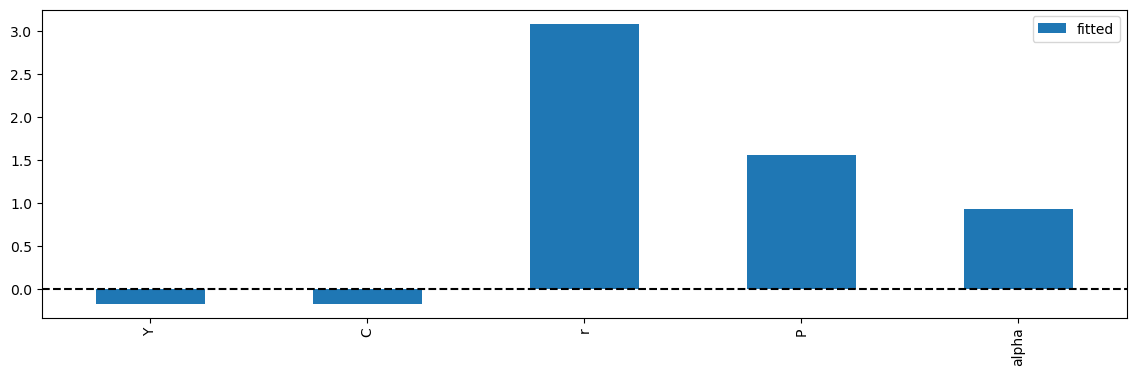

In [8]:
fig, ax = plt.subplots(figsize=(14, 4))
res.to_frame().pct_change(axis=1).apply(np.nan_to_num, posinf=0, neginf=0).drop(
    columns="initial"
).loc[lambda x: round(abs(x.fitted), 5) > 0].plot.bar(ax=ax)
ax.axhline(0, c="k", ls="--")
plt.show()

In [9]:
mod.summary(variables=["Y", "C", "r", "alpha"], results=res)

<IPython.core.display.Latex object>